In [4]:
!unzip tea_demand.zip

Archive:  tea_demand.zip
  inflating: tea_demand.csv          


In [6]:
import pandas as pd


df = pd.read_csv('tea_demand.csv', sep='\t')
df.sample()

,brand_id,date,receipts_count
442,178,2016-11-25,231


In [8]:
transactions = df[['date', 'receipts_count']]
transactions.columns = ['ds', 'y']
transactions.sample()

,ds,y
148,2016-08-19,227


In [9]:
from prophet import Prophet
m = Prophet()
m.fit(transactions)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.sample()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkriq0s_z/j4zug3_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkriq0s_z/fj09rtji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86924', 'data', 'file=/tmp/tmpkriq0s_z/j4zug3_q.json', 'init=/tmp/tmpkriq0s_z/fj09rtji.json', 'output', 'file=/tmp/tmpkriq0s_z/prophet_modele0rjqyls/prophet_model-20230630062133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
223,2017-02-09,479.002611,207.080152,733.333587,479.002554,479.002674,5.017124,5.017124,5.017124,5.017124,5.017124,5.017124,0.0,0.0,0.0,484.019736


In [ ]:
# https://chgk.tvigra.ru/letopis/?2016
# 27 марта
# 3 апреля
# 10 апреля
# 17 апреля
# 24 апреля
# 15 мая
# 22 мая
# 29 мая
# 5 июня
# 19 июня
# 25 сентября
# 2 октября
# 9 октября
# 16 октября
# 23 октября
# 20 ноября
# 27 ноября
# 11 декабря
# 18 декабря
# 25 декабря

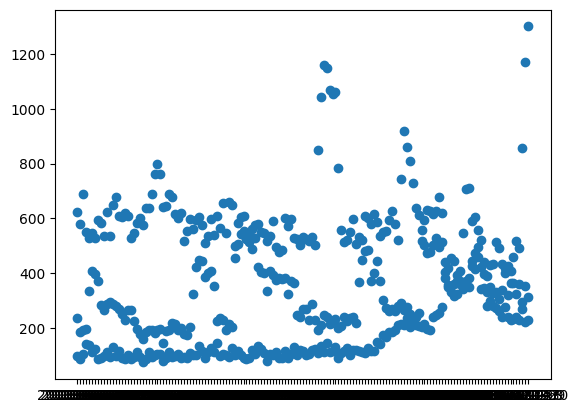

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x=transactions['ds'], y=transactions['y'], label='y')

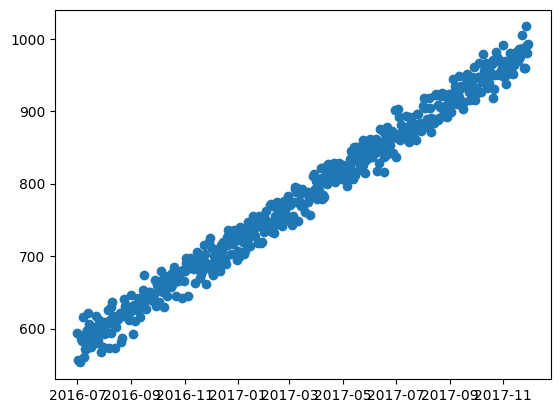

In [12]:
plt.scatter(x=forecast['ds'], y=forecast['yhat_upper'], label='upper')

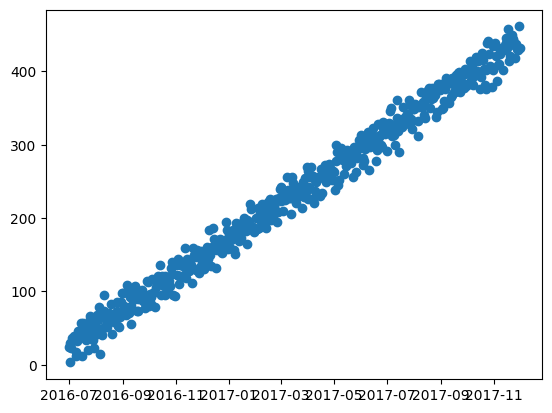

In [13]:
plt.scatter(x=forecast['ds'], y=forecast['yhat_lower'], label='lower')

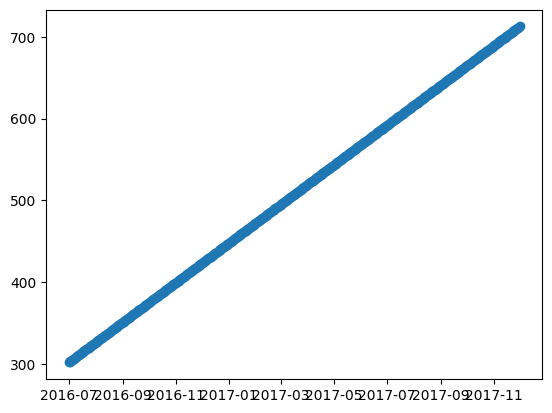

In [14]:
plt.scatter(x=forecast['ds'], y=forecast['trend'], label='trend')

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff997eef9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff997eccac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff997eeeec0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff997ece020>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff997ece680>],
 'means': []}

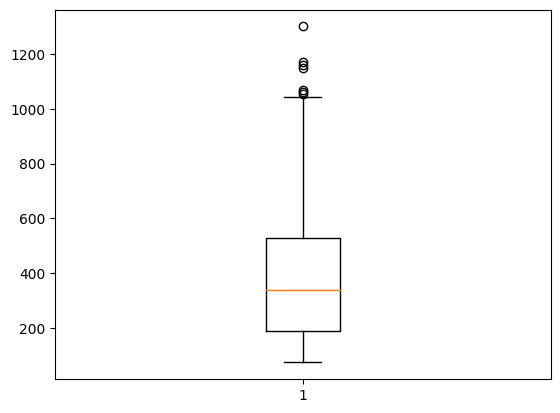

In [16]:
plt.boxplot(transactions['y'])

In [17]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=10, eps=5)
anomaly_df = dbscan.fit_predict(transactions['y'].values.reshape(-1, 1))

In [22]:
len(list(filter(lambda x: x<0, anomaly_df)))

148